In [1]:
import os

# set the environment variable to control the number of threads
# NEEDS TO BE DONE BEFORE CCL IS IMPORTED
original_omp_num_threads = os.environ.get('OMP_NUM_THREADS', None)
os.environ['OMP_NUM_THREADS'] = '1'

import pyccl as ccl
import numpy as np
import sacc
import scipy.stats.qmc as qmc
import h5py as h5
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simps

from multiprocessing import Pool, cpu_count
from parallelbar import progress_starmap
from time import time

import argparse

import src.simulate as sim

<KeysViewHDF5 ['X_train', 'dndz', 'dndz_params', 'y_train', 'z']>


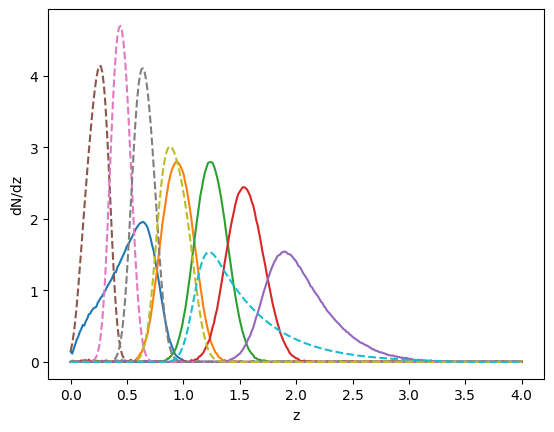

In [17]:
# Load and inspect the data
filename = 'spectra_data/60tasks_2000samples_seed456.h5'
with h5.File(filename, 'r') as f:
    print(f.keys())
    #c_ells = f['c_ells'][:]
    dndz = f['dndz'][:]
    z = f['z'][:]

k = 3
# plot the dNdz
plt.figure()
for i in range(dndz.shape[1]):
    plt.plot(z[k][i], dndz[k][i], label=f'sample {i}')
plt.xlabel('z')
plt.ylabel('dN/dz')

# Load mcmc dndz
filename = 'mcmc_chains/cl_ee_fiducial_sacc.fits'
sacc_file = sacc.Sacc.load_fits(filename)
# get redshift bins
bins = sacc_file.tracers
# convert into lists of redshifts and dndz
z = []
dndz = []
for key in bins:
    z.append(bins[key].z)
    dndz.append(bins[key].nz)

# plot the dNdz
for i in range(len(dndz)):
    plt.plot(z[i], dndz[i], label=f'bin {i}', ls='--')

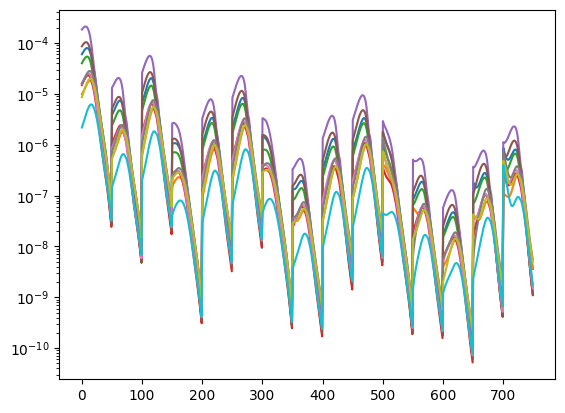

In [5]:
# Plot the spectra
plt.figure()
for i in range(len(c_ells)):
    plt.plot(c_ells[i], label=f'sample {i}')
plt.yscale('log')